# Overview over COVID-19 Data

This notebook is used to get an overview over COVID-19 data sets from the RKI (Robert Koch Institut in Germany).
It should help to get a first insight into the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("data/testnumbers_combined.csv", delimiter=',')

In [19]:
df.tail()

,Kalenderwoche,Anzahl Testungen,Positiv getestet,Positivenanteil (%),Anzahl übermittelnder Labore
52,9/2021,1151639,71647,6.22,210.0
53,10/2021,1278442,85587,6.69,214.0
54,11/2021,1364375,107658,7.89,206.0
55,12/2021,1401576,130826,9.33,200.0
56,Summe,50399177,3087687,NaN,NaN


In [62]:
df['Positiv getestet'] = pd.to_numeric(df['Positiv getestet'], errors='coerce')
df['Anzahl Testungen'] = pd.to_numeric(df['Anzahl Testungen'], errors='coerce')

In [68]:
y_number_positives = df['Positiv getestet'].iloc[:-1] # Leave last value out because it is the sum of all
y_number_tests = df['Anzahl Testungen'].iloc[:-1] # Leave last value out because it is the sum of all

In [85]:
x = df['Kalenderwoche'].iloc[1:]

In [77]:
 x_val = list(range(0, y_number_positives.shape[0]))

Text(0.5, 1.0, 'Number of Corona tests vs. positively tested people')

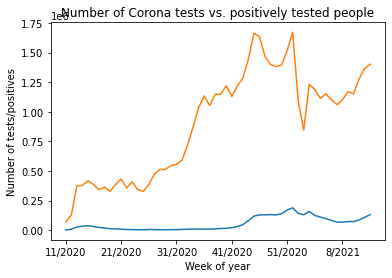

In [103]:
plt.plot(x, y_number_positives)
plt.plot(x, y_number_tests)
plt.xticks(np.arange(0, x.shape[0], step=10))
plt.xlabel('Week of year')
plt.ylabel('Number of tests/positives')
plt.title('Number of Corona tests vs. positively tested people')

# Compare numbers of Germany and Sweden
We first compare the number of positively tested people in Germany and Sweden. Both countries are currently on very different Covid-19 strategies which makes the comparison interesting.
All numbers are standardized by the population to have a meaningful comparison.

### Comparison of positives

In [110]:
df2 = pd.read_csv("data/corona_numbers_world.csv", delimiter=',')
# Remove Letter from weeks to have same representation as in first data set
df2['year_week'] = df2['year_week'].str.replace(r'W', '')

In [111]:
df2.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-15,national,AT,Austria,1954,12339,8901064.0,138.623877,15.835967,Manual webscraping
1,Austria,AT,2020-16,national,AT,Austria,773,58488,8901064.0,657.089984,1.321639,Manual webscraping
2,Austria,AT,2020-17,national,AT,Austria,479,33443,8901064.0,375.719128,1.432288,Manual webscraping
3,Austria,AT,2020-18,national,AT,Austria,349,26598,8901064.0,298.818209,1.312129,Country website
4,Austria,AT,2020-19,national,AT,Austria,249,42153,8901064.0,473.572598,0.590705,Country website


In [114]:
x_germany = df2[df2.country == "Germany"].year_week
y_germany = df2[df2.country == "Germany"].new_cases
x_sweden = df2[df2.region_name == "Sweden"].year_week
normalizer = df2[df2.region_name == "Germany"].population.iloc[0]/df2[df2.region_name == "Sweden"].population.iloc[0]
y_sweden = df2[df2.region_name == "Sweden"].new_cases*normalizer

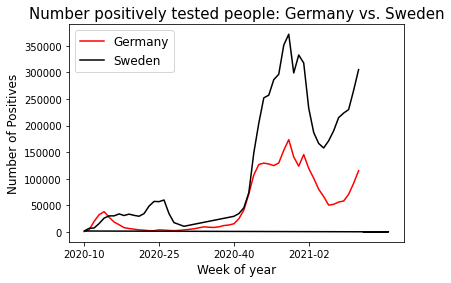

In [129]:
plt.plot(x_germany, y_germany, 'r', label="Germany")
plt.plot(x_sweden, y_sweden, 'k', label="Sweden")
plt.xticks(np.arange(0, x_germany.shape[0], step=15))
plt.xlabel('Week of year', fontsize=12)
plt.ylabel('Number of Positives',  fontsize=12)
plt.title('Number positively tested people: Germany vs. Sweden', fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Comparison of deaths

In [131]:
df3 = pd.read_csv("data/death_numbers.csv", delimiter=',')

In [132]:
df_deaths_germany = df3[df3.country == "Germany"]
df_deaths_sweden = df3[df3.country == "Sweden"]

In [140]:
y_germany_deaths

9129       0
9130       0
9131       0
9132       0
9133       0
        ... 
9189    2202
9190    1829
9191    1484
9192    1296
9193    1199
Name: weekly_count, Length: 65, dtype: int64

In [141]:
y_germany_deaths = df_deaths_germany[df_deaths_germany.indicator=="deaths"].weekly_count
x_germany_deaths = df_deaths_germany[df_deaths_germany.indicator=="deaths"].year_week

y_sweden_deaths = df_deaths_sweden[df_deaths_sweden.indicator=="deaths"].weekly_count*normalizer
x_sweden_deaths = df_deaths_sweden[df_deaths_sweden.indicator=="deaths"].year_week

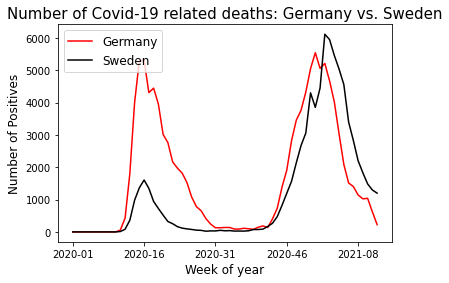

In [145]:
plt.plot(x_sweden_deaths, y_sweden_deaths, 'r', label="Germany")
plt.plot(x_germany_deaths, y_germany_deaths, 'k', label="Sweden")
plt.xticks(np.arange(0, x_germany_deaths.shape[0], step=15))
plt.xlabel('Week of year', fontsize=12)
plt.ylabel('Number of Deaths',  fontsize=12)
plt.title('Number of Covid-19 related deaths: Germany vs. Sweden', fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.show()